# Understanding the data in datasets/classification/adult/adult.csv

The jupyter notebook provides a comprehensive analysis of tabular data, focusing on various characteristics such as data types, number of rows, and number of columns. By examining these attributes, the report offers effective understanding of the dataset, enabling data analysts to gain insights and make informed decisions.

In addition to descriptive statistics, the jupyter notebook utilizes graphical representations to visualize the distribution of numerical data and explores feature correlations. Through correlation plots, the relationships between different features are analyzed, revealing potential associations and dependencies within the dataset. These insights further enhance the understanding of the data and help identify key variables that may influence the target outcome.

The jupyter notebook also investigates the distribution of categories for string features and provides class imbalance measures for classification scenarios. By assessing the balance of classes within the dataset, it highlights potential challenges in training models and making accurate predictions. This analysis is particularly valuable in machine learning tasks, as it helps to identify strategies for handling class imbalances and improving the performance of classification algorithms.

## Read dataset and set target column

### Read the csv file as pandas dataframe

In [1]:
import pandas as pd
df = pd.read_csv('adult.csv')

### Set the target column name

In [2]:
target_column = 'target'

## Display dataset statistics and characteristics
In this section we report basic cardinality of the dataset like number of rows and number of columns. We report the data types of the columns in the dataset. Some columns are numeric, representing either integers or floating-point values. Other columns are categorical, containing string or object values. Additionally, there may be datetime columns capturing specific timestamps or dates.

We also report whether any column in the dataset has missing values. These missing values indicate instances where data is not available or was not recorded for certain records. Identifying and handling these missing values appropriately is crucial to ensure accurate analysis.

Furthermore, the nature of the target variable in the dataset is essential to determine the objective of analysis. If the target variable is categorical, it implies a classification problem, where the goal is to assign instances to specific categories or classes. On the other hand, if the target variable is numeric or continuous, it signifies a regression problem, where the focus lies in predicting a numeric value based on other variables.

Understanding these various aspects of the dataset lays the foundation for further exploration, analysis, and modeling tasks.

### Get the number of rows in pandas dataframe

In [3]:
df.shape[0]

26048

### Get the number of columns in pandas dataframe

In [4]:
df.shape[1]

13

### Display the types of dataset.

In [5]:
df.dtypes

Age               float64
Workclass           int64
Education-Num     float64
Marital Status      int64
Occupation          int64
Relationship        int64
Race                int64
Sex                 int64
Capital Gain      float64
Capital Loss      float64
Hours per week    float64
Country             int64
target              int64
dtype: object

### Find if any features having missing values

In [6]:
from data_understand.dataset_characteristics import find_columns_having_missing_values
find_columns_having_missing_values(df)

No columns were found to have missing values


### Display the first ten rows of dataset.

In [7]:
df.head(10)

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,target
0,20.0,0,10.0,4,0,3,4,1,0.0,0.0,32.0,39,0
1,26.0,4,9.0,2,8,4,4,1,0.0,0.0,50.0,39,0
2,28.0,6,13.0,4,13,0,4,1,0.0,0.0,45.0,39,0
3,35.0,4,9.0,2,7,4,4,1,0.0,0.0,40.0,39,0
4,54.0,4,9.0,5,1,1,4,0,0.0,0.0,38.0,33,0
5,30.0,4,9.0,2,6,4,4,1,0.0,0.0,50.0,39,0
6,61.0,4,3.0,4,6,0,2,1,0.0,2339.0,40.0,39,0
7,72.0,0,13.0,5,0,0,4,0,991.0,0.0,7.0,39,0
8,73.0,4,11.0,6,10,0,4,1,25124.0,0.0,60.0,39,1
9,62.0,4,13.0,2,4,4,4,1,0.0,0.0,50.0,39,1


## Visualize distributions of the dataset
This section have different graphs using which you can visualize distibutions of different features in your dataset, visualize the distibution of various categories for categorical features, visualize the histogram distribution of numerical features and visualize the box plot distribution between categories in categorical columns and numerical columns.

### Generate histogram distribution for continous features
The section shows the histogram distribution of various numerical features in your dataset. The graphs also show a line chart which helps understand how the normal distribution will look if the numerical values in the distribution were normally distributed. These graphs also help gauge if the distibution of data in a particular column in skewed in any direction.

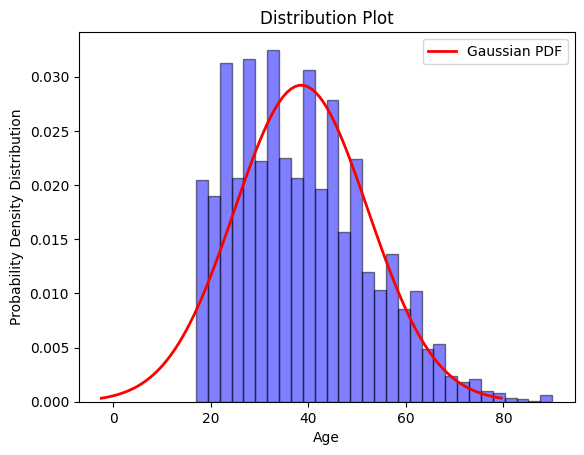

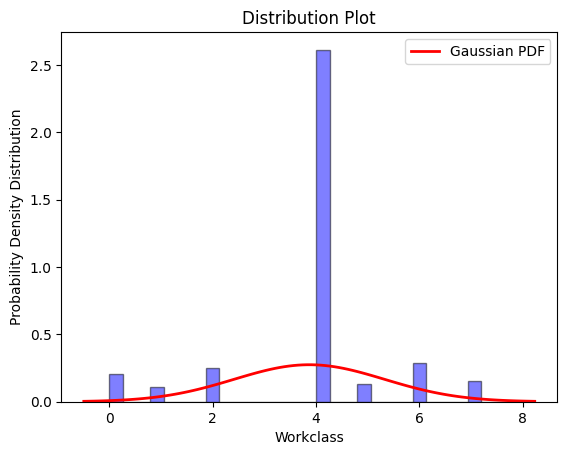

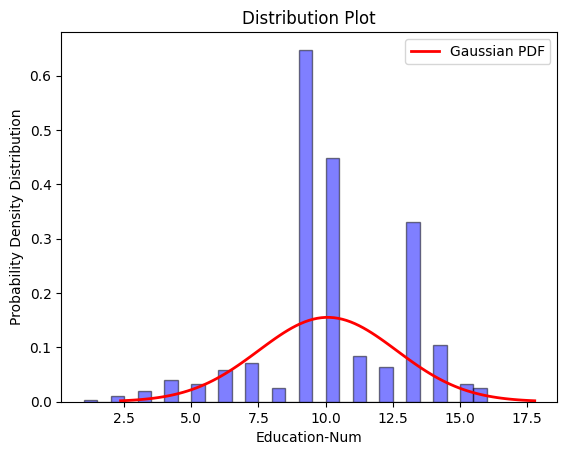

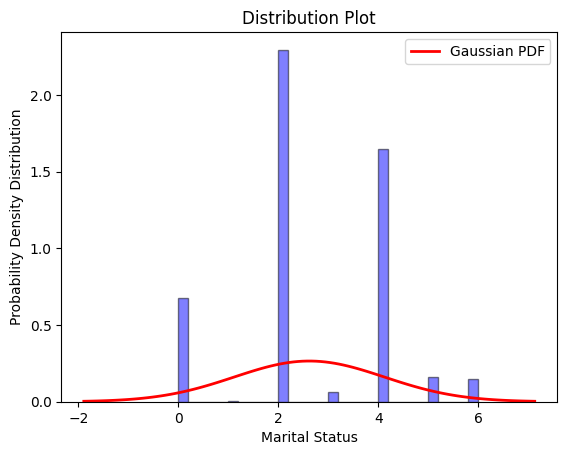

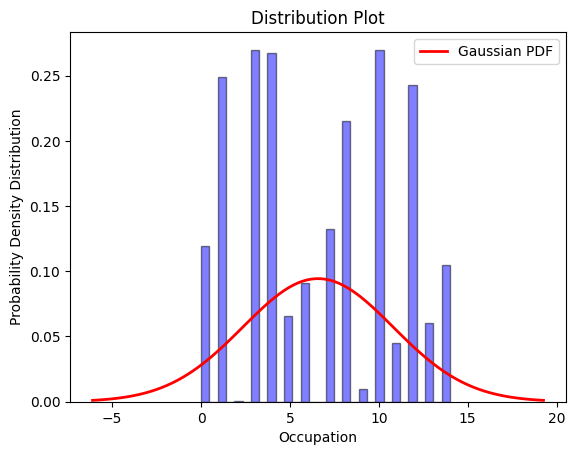

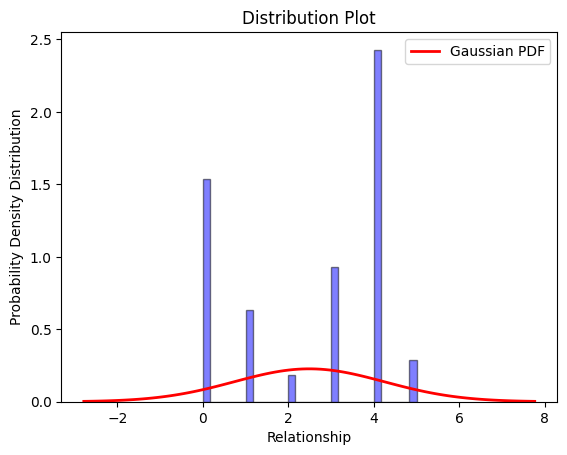

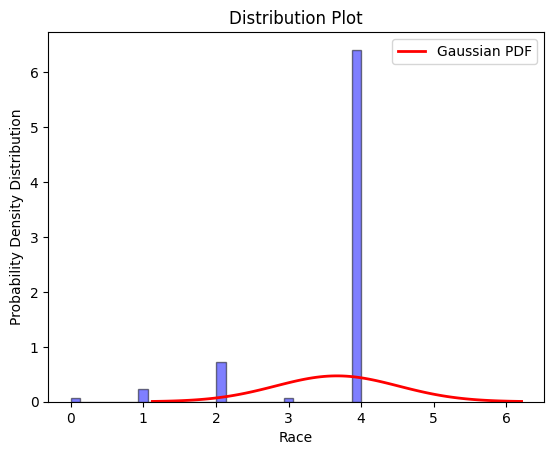

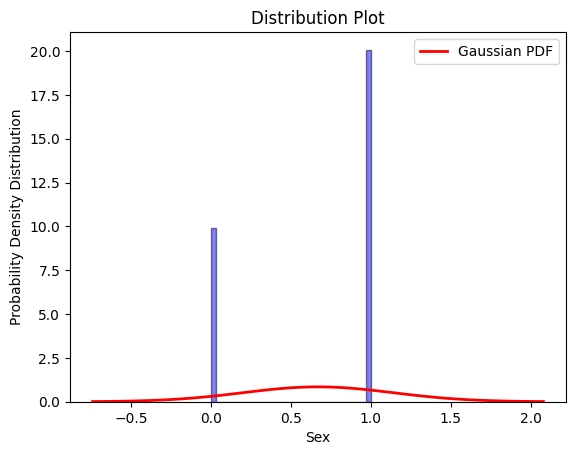

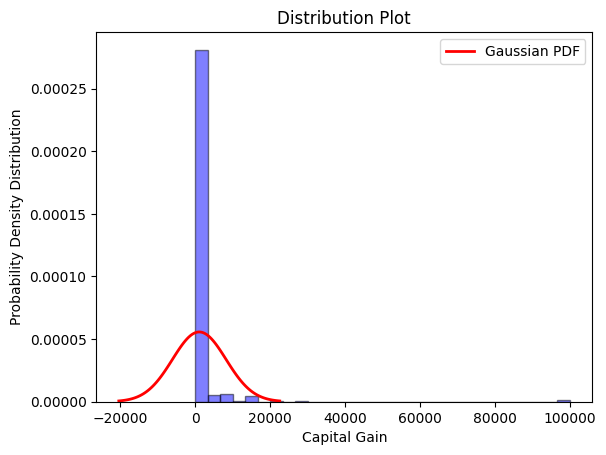

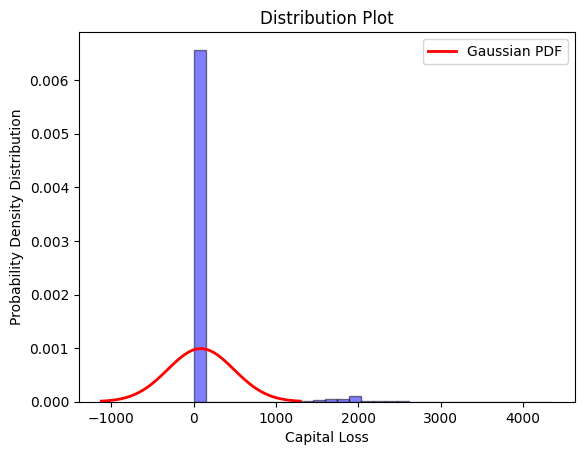

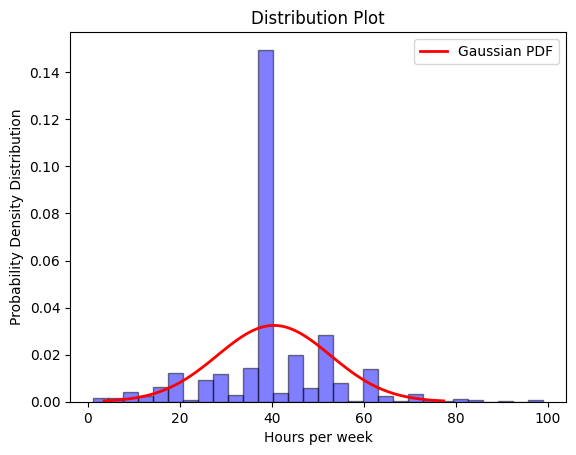

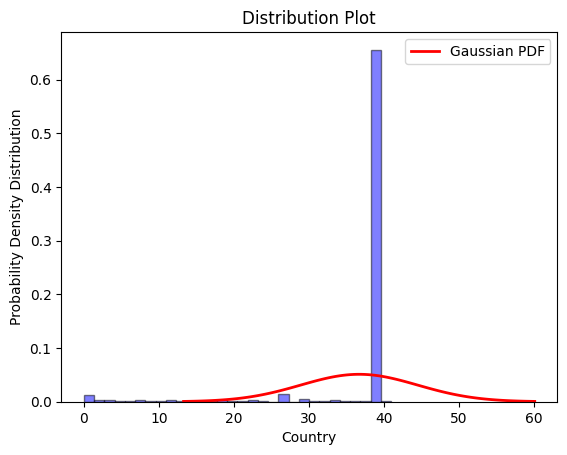

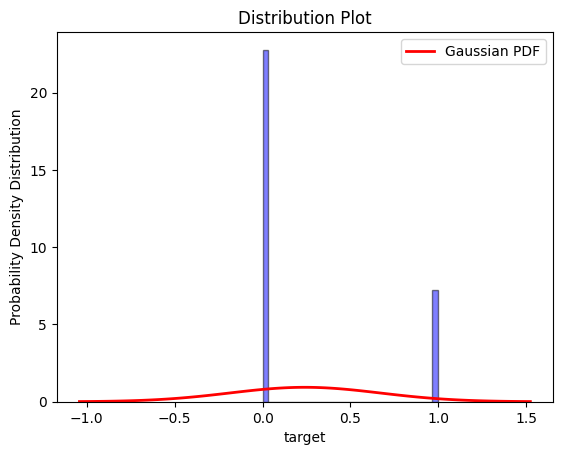

In [8]:
from data_understand.value_distributions import generate_histogram_distributions
generate_histogram_distributions(df)

### Generate frequency distribution for categorical features
The section shows the distribution of individual categories in a given categorical column. The distribution helps to understand which categories in a given column are most/least prevelant in your dataset.

In [9]:
from data_understand.value_distributions import generate_cat_frequency_distributions
generate_cat_frequency_distributions(df)

### Generate box plot distributions between categories in catergorical and numerical features
The section shows the box plot distribution of between the categories in categorical columns and numerical values in a numerical column. These graphs help in uncovering patterns that exist between various categories in a categorical column with the values in the numerical columns.

In [10]:
from data_understand.value_distributions import generate_box_plot_distributions
generate_box_plot_distributions(df)

## Feature Correlations
This section shows the numerical feature pairs having positive and negative correlation. The correlation have been computed using [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). Examination of feature correlation can help find if the data has [leaky features](https://en.wikipedia.org/wiki/Leakage_(machine_learning)).

### Generate a table for numerical features pairs having positive feature correlation

In [11]:
from data_understand.feature_correlation import get_top_k_postively_correlated_feature_pairs
get_top_k_postively_correlated_feature_pairs(df, 5)

,feature1,feature2,correlation
77,Relationship,target,0.340328
38,Education-Num,target,0.334127
72,Relationship,Sex,0.327751
53,Occupation,Workclass,0.254979
12,Age,target,0.234698


### Generate a table for numerical features pairs having negative feature correlation

In [12]:
from data_understand.feature_correlation import get_top_k_negatively_correlated_feature_pairs
get_top_k_negatively_correlated_feature_pairs(df, 5)

,feature1,feature2,correlation
3,Age,Marital Status,-0.265195
44,Marital Status,Relationship,-0.231350
51,Marital Status,target,-0.202481
133,Hours per week,Marital Status,-0.186687
46,Marital Status,Sex,-0.129872


### Generate feature correlation graph for numerical features
Feature correlation graph showing the scatter plot between any two numerical features. This graph helps to understand if there are any correlation between numerical features.

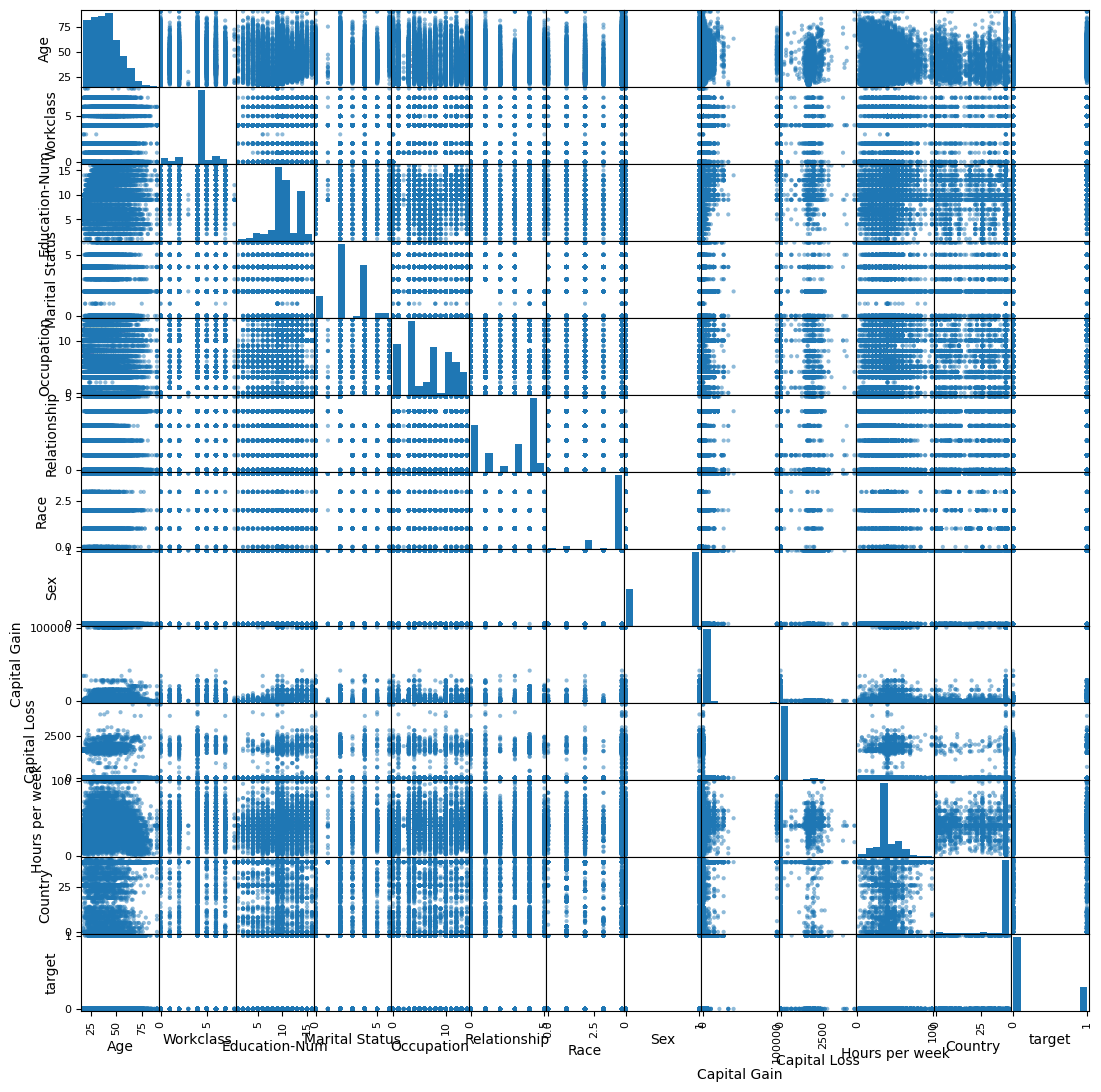

In [13]:
from data_understand.feature_correlation import generate_correlation_matrices
generate_correlation_matrices(df)

## Find target column imbalances in classification scenarios
In this section we show statistics to bring out the imbalance between the different classes in the target column for a classification problem. This will help you learn if you need to address the issue of [class imbalance](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data) in your dataset.

### Find if there is any class imbalance in the dataset for classification scenarios.

In [14]:
from data_understand.class_imbalance import find_target_column_imbalance
find_target_column_imbalance(df, target_column)

The summary of number of instances of each class is below
- The number of instances of class 0 are: 19775
- The number of instances of class 1 are: 6273

The majority class is: 0
- The ratio of number of instances of majority class 0 to class 1 is: 3.152399171050534



## References
You can visit the following links for further exploration:- 
- [data.understand](https://github.com/ggupta2005/data.understand)